<a href="https://www.kaggle.com/code/rakeshrk07/handwritten-digit-recognition-using-ann-99-acc?scriptVersionId=162282403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handwritten-digit-recognition/train.csv
/kaggle/input/handwritten-digit-recognition/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/handwritten-digit-recognition/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* ***In our dataset, we have a total of 785 columns. One of these columns is the label column, which contains the target variable (Y). The remaining 784 columns are the features, which represent the pixel values of a 28x28 image.***
* ***Each row in our dataset represents one image. The 784 feature columns together form the pixel values of the image. By reshaping these 784 values into a 28x28 grid, we can reconstruct the original image.***

In [3]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [4]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

* ***Our dataset does not contain any missing values, and the distribution of data across different categories or classes is fairly balanced.***

In [5]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [6]:
max(x[2])

255

In [7]:
x=x/255
max(x[2])

1.0

* ***What I've done is rescale the pixel values to fall within the range of 0 to 1. This normalization process involves dividing each pixel value by the maximum pixel value (typically 255 for grayscale images). By scaling the pixel values to this range, it helps improve the efficiency of the model during training.***

### ***Now, let's visualize how the handwritten images look.***

* ***Since we have a large number of images, I'll randomly select 50 images and plot them.***

In [8]:
import matplotlib.pyplot as plt

In [9]:
sample=df.sample(50)
pixel_val=sample.iloc[:,1:].values
pixel_val


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
actual_digits=sample.iloc[:,0].values
actual_digits

array([3, 6, 9, 0, 8, 4, 0, 3, 1, 8, 4, 2, 7, 9, 1, 7, 1, 9, 5, 7, 5, 4,
       1, 7, 6, 6, 6, 6, 5, 3, 4, 3, 2, 0, 8, 7, 5, 9, 8, 8, 7, 0, 4, 2,
       1, 9, 7, 9, 3, 8])

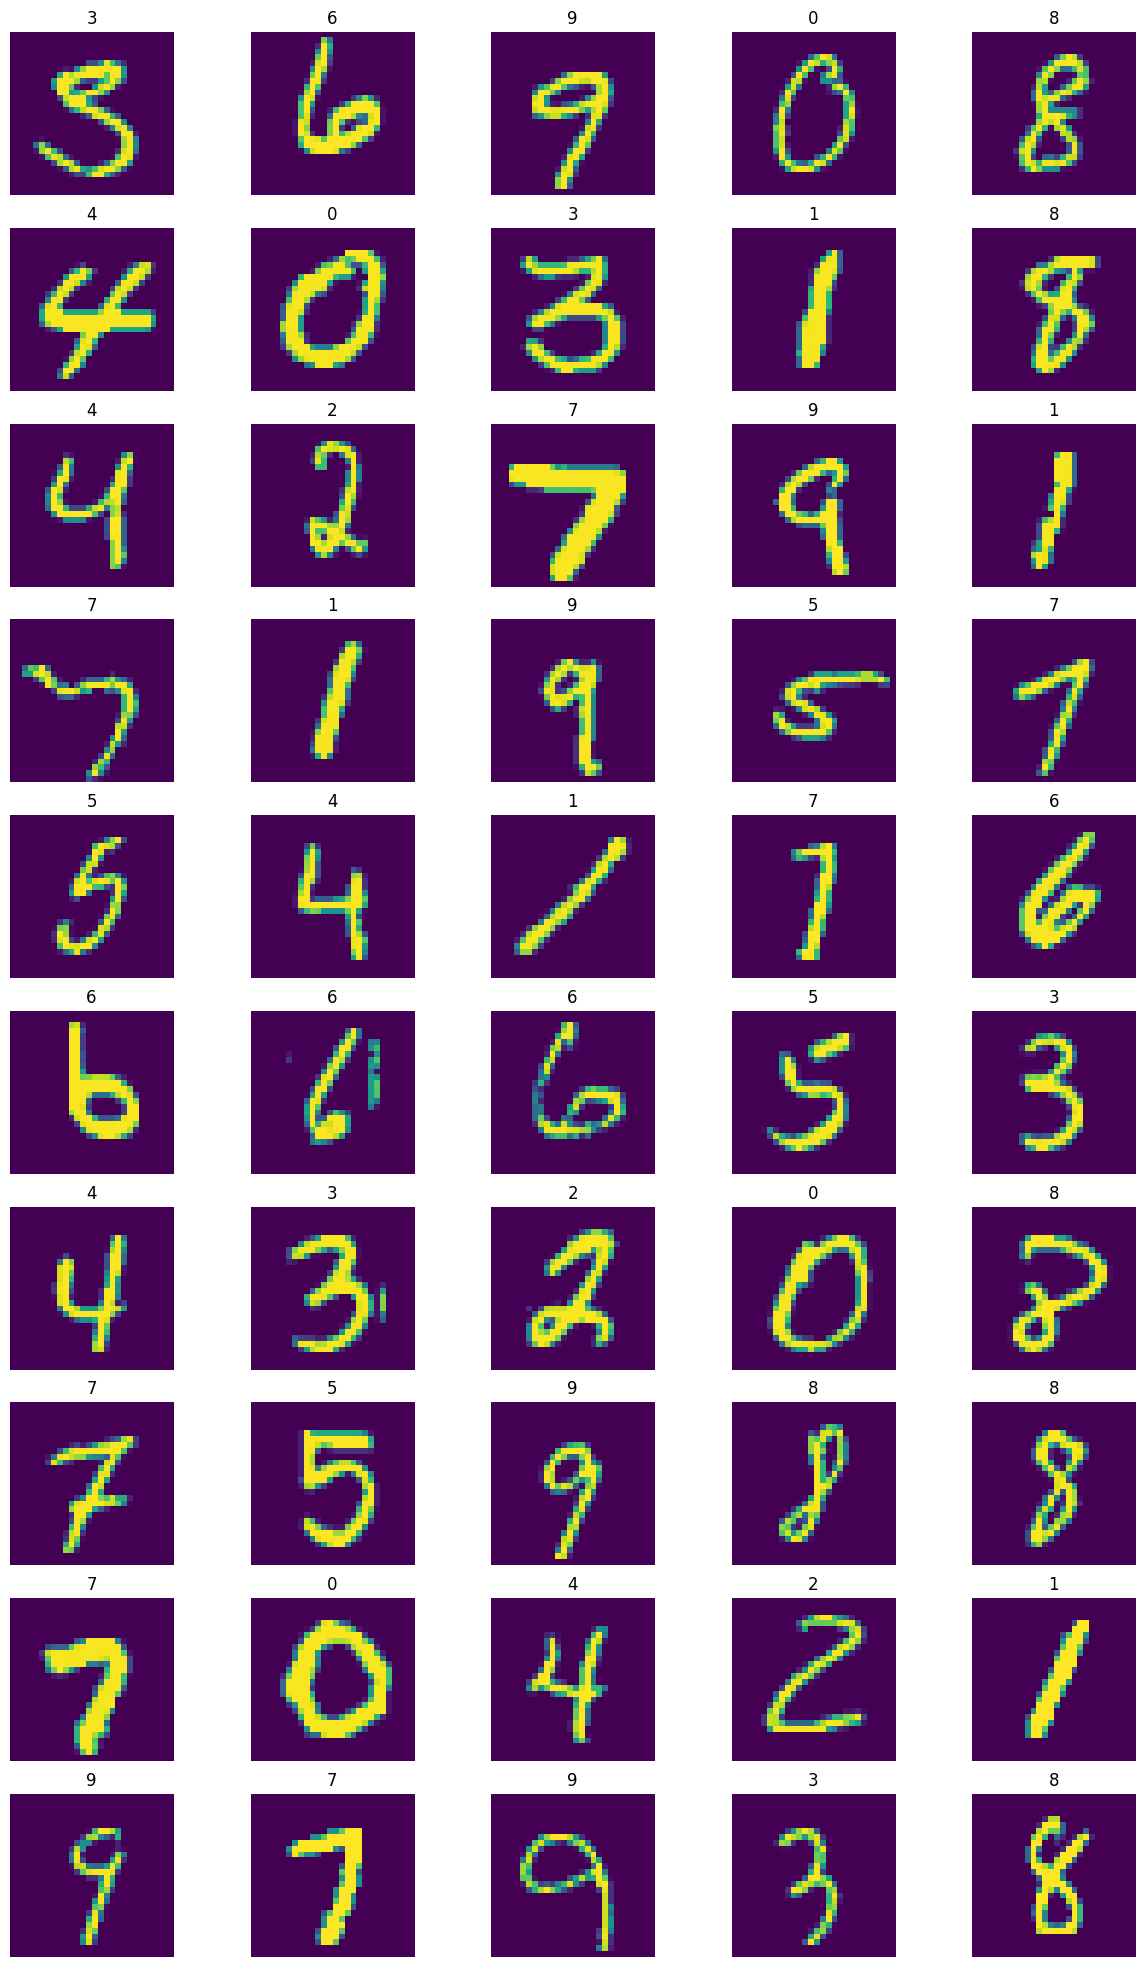

In [11]:
fig,axes=plt.subplots(10,5,figsize=(15,25))
for i in range(50):
    row=i//5
    col=i%5
    axes[row,col].imshow(pixel_val[i].reshape(28,28))
    axes[row,col].set_title(actual_digits[i])
    axes[row, col].axis('off')
    
    
    

## ***Model Building***

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [14]:
print('x_train shape=',x_train.shape)
print('y_train shape=',y_train.shape)

x_train shape= (33600, 784)
y_train shape= (33600,)


**Lets Try Some Machine learning models first**

1. ***Logistic Regression***

* ***I have a question for you -***
Can we apply logistic regression for multi-classification problems?? Or do you think it can be only applied for binary classification problems.

Well lets find out

In [15]:
from sklearn.linear_model import LogisticRegression


In [16]:
lg=LogisticRegression(multi_class='multinomial')

In [17]:
lg.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [18]:
y_pred_logistic=lg.predict(x_test)
y_pred_logistic

array([8, 1, 9, ..., 3, 0, 9])

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,y_pred_logistic)

0.9216666666666666

***The results are not poor, but they are not excellent either.***



***Let's try another very famous ensemble learning algorithm.***

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc=RandomForestClassifier()

In [23]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_pred_rfc=rfc.predict(x_test)

In [25]:
accuracy_score(y_test,y_pred_rfc)

0.9627380952380953

***Random forest is also not giving much satisfactory results,Although we can enhance its performance by employing hyperparameter tuning techniques, such as randomized search CV.***

***Code***

from sklearn.model_selection import RandomizedSearchCV

para_grid={'n_estimators':[50,75,100],
            'criterion':['gini', 'entropy', 'log_loss'},
            'max_depth':[None,10,20]
            }

rsv=RandomizedSearchCV(estimator='rfc',param_distributions=param_grid,n_iter=10,cv=10)

rsv.fit(x_train,y_train)

rsv.best_params_

## ***Let's Jump into the world of deep learning-ANN***

In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-02-09 09:48:30.960735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 09:48:30.960886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 09:48:31.150956: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
model=Sequential()
model.add(Dense(75,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='softmax'))

## Note - The number of nodes and activation functions are experimental, and the results can be significantly improved by identifying the most optimal parameters.
#I have determined these parameters through experimentation.

In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                58875     
                                                                 
 dense_1 (Dense)             (None, 50)                3800      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 63905 (249.63 KB)
Trainable params: 63905 (249.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
history=model.fit(x_train,y_train,epochs=15,batch_size=32,validation_split=0.2)

Epoch 1/15
840/840 [==============================] - 4s 4ms/step - loss: 0.4393 - accuracy: 0.8643 - val_loss: 0.2345 - val_accuracy: 0.9320
Epoch 2/15
840/840 [==============================] - 2s 3ms/step - loss: 0.1811 - accuracy: 0.9451 - val_loss: 0.1691 - val_accuracy: 0.9519
Epoch 3/15
840/840 [==============================] - 3s 3ms/step - loss: 0.1288 - accuracy: 0.9613 - val_loss: 0.1597 - val_accuracy: 0.9539
Epoch 4/15
840/840 [==============================] - 3s 3ms/step - loss: 0.0962 - accuracy: 0.9706 - val_loss: 0.1431 - val_accuracy: 0.9615
Epoch 5/15
840/840 [==============================] - 3s 3ms/step - loss: 0.0787 - accuracy: 0.9760 - val_loss: 0.1262 - val_accuracy: 0.9653
Epoch 6/15
840/840 [==============================] - 3s 3ms/step - loss: 0.0638 - accuracy: 0.9788 - val_loss: 0.1379 - val_accuracy: 0.9589
Epoch 7/15
840/840 [==============================] - 3s 3ms/step - loss: 0.0495 - accuracy: 0.9839 - val_loss: 0.1313 - val_accuracy: 0.9659
Epoch 

* ***ANNs are providing pretty good results.***
* ***validation accuracy is also almost the same as testing accracy so we can say that it's not too overfited***

In [31]:
# this history contain the accuracy and loss along of each iteration
history.history

{'loss': [0.43934085965156555,
  0.1810932457447052,
  0.12879103422164917,
  0.09618742763996124,
  0.07871150225400925,
  0.06379474699497223,
  0.04946035519242287,
  0.041178300976753235,
  0.03624344617128372,
  0.03288593143224716,
  0.027287689968943596,
  0.02498311549425125,
  0.018145663663744926,
  0.022725790739059448,
  0.01984211802482605],
 'accuracy': [0.8642857074737549,
  0.945126473903656,
  0.9612722992897034,
  0.9706473350524902,
  0.975967288017273,
  0.9787574410438538,
  0.9838541746139526,
  0.9863839149475098,
  0.988095223903656,
  0.9891369342803955,
  0.991220235824585,
  0.9913318157196045,
  0.9939360022544861,
  0.9921875,
  0.9928199648857117],
 'val_loss': [0.23452502489089966,
  0.16912582516670227,
  0.1596718430519104,
  0.14309944212436676,
  0.12621591985225677,
  0.1378885954618454,
  0.1313011199235916,
  0.13501940667629242,
  0.14116589725017548,
  0.1311522275209427,
  0.1472511887550354,
  0.14624522626399994,
  0.17306436598300934,
  0.156

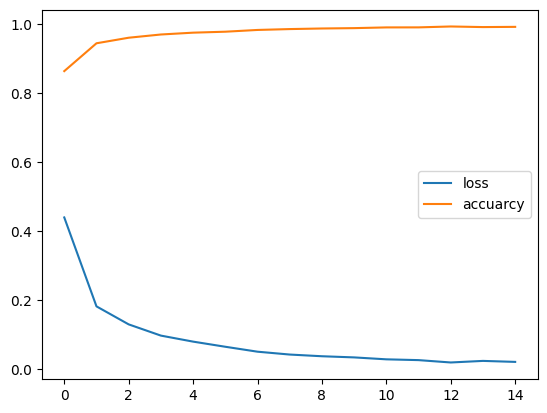

In [32]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='accuarcy')
plt.legend()
plt.show()

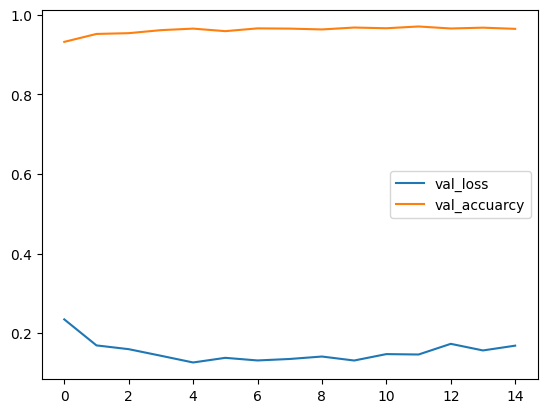

In [33]:
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_accuarcy')
plt.legend()
plt.show()